# Calculate distances

Get information about pixel-cm

In [ ]:
#@title Libraries

import os
from os import listdir
from os.path import isfile, join

import skimage
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2

from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh

In [ ]:
import pandas as pd
data = pd.read_csv('data_kidney.csv')
data

,idx,g_dif_corticomedular,g_cortical_hiperecogénica,label,les1,les2,les3,les4,les5,les6,les7,les8,les9,les10,les11,les12,sum lesions
0,I20181002081653000,0,0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,I20181002081653953,0,0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,I20181002081654546,1,1,pathological,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,I20181002081717812,0,0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,I20181002081717968,0,0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,I20181002081338984,0,0,pathological,hidronefrosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1981,I20181002081356218,0,0,pathological,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1982,I20181002081501906,0,0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1983,I20181002081652609,0,0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
images = {}
im2 = []

for root, dirs, files in os.walk('bbdd_kidney/images'):
   path = root.split(os.sep)
   for index, file in enumerate(files):
      im2 = [ f for f in listdir(root) if isfile(join(root,f)) ]
      images[index] = join(root,im2[index])

#FUNCTIONS

In [ ]:
def crop_y(image , x1=90,x2=150,y1=50,y2=150):
  """
  Return the cropped image at the x1, x2, y1, y2 coordinates
  """
  return image[y1:y2 , x1:x2, :]

In [ ]:
def crop_x(image, x1=100,x2=250, y1=38,y2=48):
  """
  Return the cropped image at the x1, x2, y1, y2 coordinates
  """
  return image[y1:y2 , x1:x2, :]

In [ ]:
def crop_x2D(image, x1=100,x2=250, y1=38,y2=48):
  """
  Return the cropped image at the x1, x2, y1, y2 coordinates
  """
  return image[y1:y2 , x1:x2]

## Tests: cropping dot part of the image

### VERTICAL example

(561, 800, 3)


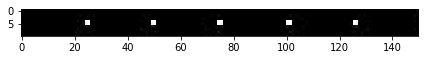

In [ ]:
img = io.imread(images[0])

print(np.shape(img))
img_cropped = crop_x(img )#, 90,150,50,145)
io.imshow(img_cropped)

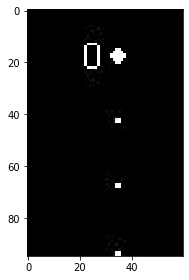

In [ ]:
img_cropped = crop_y(img , 90,150,50,145)
io.imshow(img_cropped)

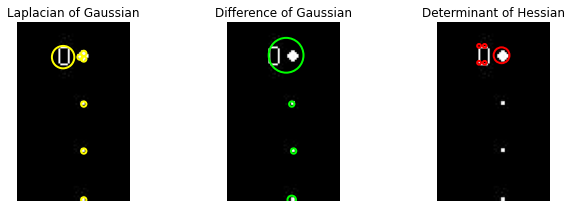

In [ ]:
#@title Using different methods

image_gray = skimage.color.rgb2gray(img_cropped)
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img_cropped)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

### HORIZONTAL example



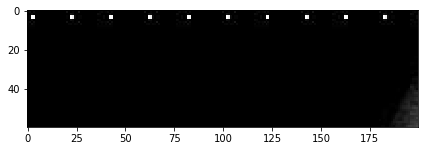

In [ ]:
img = io.imread(images[1000])
img_cropped = crop_x(img,100,300,0,60)
io.imshow(img_cropped)


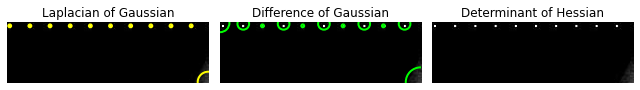

In [ ]:
#@title Using different methods 

image_gray = skimage.color.rgb2gray(img_cropped)
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img_cropped)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

## Find the points

In [ ]:
def find_points(image, laplacian=True):
	image_gray = skimage.color.rgb2gray(image)
	if laplacian == True:
		blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
		blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
		return blobs_log

	else:
		blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
		blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
		return blobs_dog


In [ ]:
points = find_points(img,laplacian=True)
points

array([[ 23.        ,  72.        ,   1.41421356],
       [ 42.        , 101.        ,   1.41421356],
       [ 42.        ,  74.        ,   1.41421356],
       [ 43.        , 125.        ,   1.41421356],
       [ 37.        , 101.        ,   1.41421356],
       [ 22.        , 143.        ,   1.41421356],
       [ 35.        , 141.        ,   1.41421356],
       [ 37.        ,  90.        ,   1.41421356],
       [ 38.        , 134.        ,   1.41421356],
       [ 43.        ,  50.        ,   1.41421356],
       [ 22.        ,  60.        ,   1.41421356],
       [ 22.        , 101.        ,   1.41421356],
       [ 43.        ,  25.        ,   1.41421356],
       [ 38.        , 126.        ,   1.41421356],
       [ 21.        ,  51.        ,   1.41421356],
       [ 22.        ,  90.        ,   1.41421356],
       [ 24.        , 103.        ,   1.41421356],
       [ 37.        ,  60.        ,   1.41421356],
       [ 24.        , 141.        ,   1.41421356],
       [ 35.        ,  58.     

# Combine all

Create a more general approach using the horizontal

In [1]:
#@title crop function

def crop_image(img):
  if len(np.shape(img)) == 3:
    img1 = crop_x(img,100,300,0,60)
  else:
    img1 = crop_x2D(img,100,300,0,60)
  points = find_points(img1,laplacian=False)
  for p in points:
    if p[2] <1.5:
      x = int(p[1])
      y = int(p[0])
      break
  try:
    if y <3:
      y=3
  except:
    img = second_crop(img)
    return img
  if x<49:
    x=50
  img = crop_x(img, x1=(x-10),x2=(x+130),y1=(y-2),y2=(y+2))
  return img

def second_crop(img):
  if len(np.shape(img)) == 3:
    img1 = crop_x(img,100,300,0,60)
  else:
    img1 = crop_x2D(img,100,300,0,60)
  points = find_points(img1,laplacian=True)
  for p in points:
    if p[2] <1.5:
      x = int(p[1])
      y = int(p[0])
      break
  try:
    if y <3:
      y=3
  except UnboundLocalError:
    img = crop_x(img,y1=0)
    return img
  if x<49:
    x=50
  img = crop_x(img, x1=(x-10),x2=(x+130),y1=(y-2),y2=(y+2))
  return img

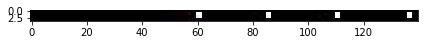

In [ ]:
img = io.imread(images[1000])
a = crop_image(img)
io.imshow(a)

In [ ]:
def add_border(image, bt=5):
    image = skimage.color.rgb2gray(image)
    
    image_b = cv2.copyMakeBorder(image, bt, bt, bt, bt, cv2.BORDER_CONSTANT)
    
    return image_b


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


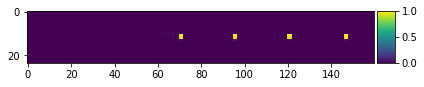

In [ ]:
b = add_border(a, bt=10)
io.imshow(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


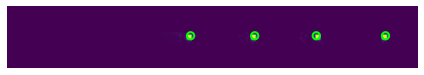

In [ ]:
points = find_points(b)
fig, ax = plt.subplots()

ax.imshow(b)
for blob in points:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
#@title Get distance from points

def get_distance_x(points):
  all =[]
  for p in points:
    if p[2] < 1.5:
      all.append(p[1])
  all =np.sort(all)
  distances = [abs(all[i] - all[i+1]) for i in range(len(all)-1)]
  return distances

In [ ]:
d = get_distance_x(points)
print(d)
print(np.mean(d))

[39.0, 41.0, 39.0]
39.666666666666664
